# 3 Arm Foraging maze

In [1]:
import os
import pickle

import numpy as np
import matplotlib.pyplot as plt

In [130]:
colors=('xkcd:water blue','xkcd:scarlet','xkcd:mango')#,'xkcd:grass green')

with open('dfSessList.pkl','rb') as fname:
    dfSessList=pickle.load(fname)
    
with open('dfVI.pkl','rb') as fname:
    dfVI=pickle.load(fname)
    
with open('dfLing.pkl','rb') as fname:
    dfLing=pickle.load(fname)
    
with open('dfTince.pkl','rb') as fname:
    dfTince=pickle.load(fname)
    
listSubj=np.array(list(set(dfVI.subj)))
listSubj.sort()


<img src="W71_0745.JPG" alt="3 Arm Foraging maze" title="3 Arm Foraging maze" />

<img src="W71_0731.JPG" alt="3 Arm Foraging maze - poke close-up" title="3 Arm Foraging maze - poke close-up" />

We trained rats on a number of related foraging tasks on the 3-arm maze depicted above. Arms are 20 inches long, 120º apart from each other, and each are equipped with floor lights and a nose-port at the end. Floor lights were used as cues, and nose-ports were used to register nose-poke responses and deliver water rewards according to different contingencies described below.

## 1. Dynamic Bandit
(concurrent variable interval schedules)

In this task variant the first response at each of the three arms was rewarded. After that, a new response at arm $k$ was rewarded as long as more than $X_k$ seconds had elapsed since last rewarded response at the same arm, where $X_k \sim Exp(\lambda_k)$. Values of $\lambda$ were set anew at the beginning of each session by sampling randomly without replacement from the set $\{30^{-1},60^{-1},120^{-1}\}$. Since $E[X_k]=\lambda_k^{-1}$, average intervals at arms $A=\{0,1,2\}$ were a random permutation of $I=\{30, 60, 120\}$ seconds. For a given arm $k$, a new $X_k$ was sampled after each reward event.

In other words, this is a probabilistic 3-armed bandit task where probability of reward grows monotonically with time since last response at the same arm. Specifically, responding at arm $k$ at time $t_k$ was rewarded with probability $F_{X_k}(t_k) = 1 - e^{-\lambda_k t_k}$ (i.e. the CDF of $Exp(\lambda_k)$ evaluated at $t_k$).

### Results

In [3]:
display(dfSessList)

IRI    VI   cued  deplete  dur  meanA  meanB  meanC  rewSize
subj  date                                                                  
TG023 20180621    1  True  False    False   66     60     30    120       40
      20180622    1  True  False    False   59     60     30    120       40
      20180625    1  True  False    False   64     60     30    120       40
      20180626    1  True  False    False   53     60    120     30       40
      20180627    1  True  False    False   56     60     30    120       40
      20180628    1  True  False    False   52    120     60     30       40
      20180629    1  True  False    False   62    120     30     60       40
TG024 20180621    1  True  False    False   55    120     30     60       40
      20180622    1  True  False    False   53    120     60     30       40
      20180625    1  True  False    False   52     60     30    120       40
      20180626    1  True  False    False   49     30     60    120       40
      20180627    1  True  False    False   51    120     30     60       40
      20180628    1  True  False    False   60    120     30     60       40
      20180629    1  True  False    False   55     30     60    120       40
TG025 20180620    1  True  False    False   50    120     60     30       40
      20180621    1  True  False    False   68     60    120     30       40
      20180622    1  True  False    False   74    120     30     60       40
      20180625    1  True  False    False   61     30    120     60       40
      20180626    1  True  False    False   45    120     60     30       40
      20180627    1  True  False    False   52     30    120     60       40
      20180628    1  True  False    False   52     30    120     60       40
      20180629    1  True  False    False   43     60     30    120       40
TG026 20180620    1  True  False    False   56    120     30     60       40
      20180621    1  True  False    False   72     30    120     60       40
      20180622    1  True  False    False   46    120     60     30       40
      20180625    1  True  False    False   53     30     60    120       40
      20180626    1  True  False    False   48     60    120     30       40
      20180627    1  True  False    False   49    120     60     30       40
      20180628    1  True  False    False   67    120     60     30       40
      20180629    1  True  False    False   52     30    120     60       40

**Table 1.1** List of all sessions included in current analyses. n = 4 subjects, 7-8 sessions each. Session duration in minutes, mean interval for each arm in seconds, reward magnitude in microliters.

In [52]:
dfVI.sample(15).sort_index().iloc[:,[0,1,3,2,4]]

,subj,date,interval,armNo,armVal
ndx,,,,,
167,TG023,20180621,23.3036,1,0
464,TG023,20180625,30.2456,0,1
519,TG023,20180626,32.1855,1,0
559,TG023,20180626,15.2191,1,0
838,TG023,20180628,194.1751,0,2
1246,TG024,20180621,134.8976,1,2
1371,TG024,20180622,18.3997,2,0
1548,TG024,20180626,29.1902,2,2
1747,TG024,20180627,152.6210,0,1


**Table 1.2** Sample data from table of intervals. *Interval* is time elapsed between a rewarded response and the time when another reward is made available at the same arm.  *armNo* identifies physical arm ($k$). *armVal* identifies ranked value of $\lambda_k$ assigned to arm $k$ on a given session.

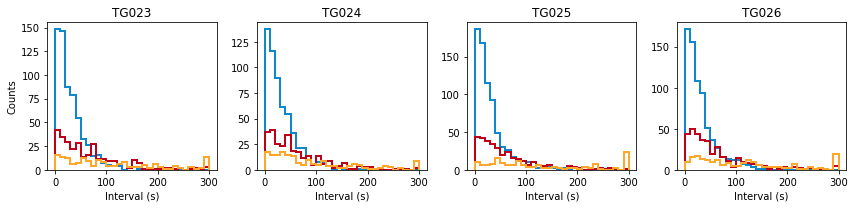

In [129]:
hf, ha = plt.subplots(1,len(listSubj),figsize=(12,3))#,sharex=True,sharey=True)
ha[0].set_ylabel('Counts')
for iSubj in range(len(listSubj)):
    nameSubj=listSubj[iSubj]
    
    dfVI_subj=dfVI[dfVI['subj']==nameSubj]
    
    listSess=np.array(list(set(dfVI_subj['date'])))
    listSess.sort()
    
    ha[iSubj].set_xlabel('Interval (s)')
    ha[iSubj].set_title(nameSubj)

    for iArm in set(dfVI_subj['armVal']):
        
        dfVI_arm=dfVI_subj[dfVI_subj['armVal']==iArm]
        x=dfVI_arm.interval
        x=x.clip(0,300)
        ha[iSubj].hist(x,bins=np.linspace(0,300,31),cumulative=False,density=False,histtype='step',color=colors[iArm],lw=2)
                
plt.tight_layout()

**Figure 1.1** Histograms of interval between rewarded response and next reward availability, pooled over sessions within arms of same $\lambda_k$. This is a sanity-check MC reconstruction of $Exp(\lambda_k)$.

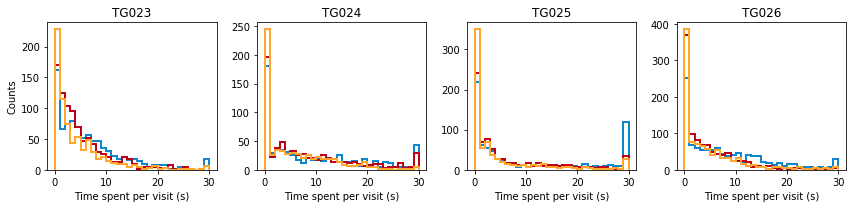

In [101]:
hf, ha = plt.subplots(1,len(listSubj),figsize=(12,3))#,sharex=True,sharey=True)
ha[0].set_ylabel('Counts')
for iSubj in range(len(listSubj)):
    nameSubj=listSubj[iSubj]
    
    dfLing_subj=dfLing[dfLing['subj']==nameSubj]
    
    listSess=np.array(list(set(dfLing_subj['date'])))
    listSess.sort()
    
    ha[iSubj].set_xlabel('Time spent per visit (s)')
    ha[iSubj].set_title(nameSubj)
    
    listArmVal=np.array(list(set(dfLing_subj['armVal'])))
    listArmVal.sort()

    for iArm in range(len(listArmVal)):
        
        dfLing_arm=dfLing_subj[dfLing_subj['armVal']==listArmVal[iArm]]
        x=dfLing_arm.lingert
        x=x.clip(0,30)
        ha[iSubj].hist(x,bins=np.linspace(0,30,31),cumulative=False,density=False,histtype='step',color=colors[iArm],lw=2)
                
plt.tight_layout()

**Figure 1.2** Histogram of time spent at an arm per visit (computed from time difference between first and last response, __[clipped](https://docs.scipy.org/doc/numpy/reference/generated/numpy.clip.html)__ at 30s for display purposes), pooled over sessions within arms of same $\lambda_k$.

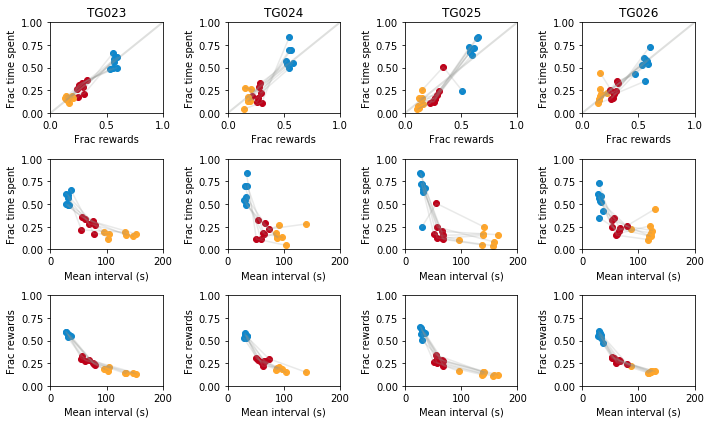

In [90]:
hf, ha = plt.subplots(3,len(listSubj),figsize=(10,6))#,sharex=True,sharey=True)

for iSubj in range(len(listSubj)):
    nameSubj=listSubj[iSubj]
    
    dfVI_subj=dfVI[dfVI['subj']==nameSubj]
    dfLing_subj=dfLing[dfLing['subj']==nameSubj]
    
    listSess=np.array(list(set(dfVI_subj['date'])))
    listSess.sort()
    
    ha[0,iSubj].plot([0,1],[0,1],c='xkcd:gray',lw=2, alpha=.3)
    
#     print(nameSubj,listSess)
        
    for iSess in range(len(listSess)):
        dfVI_sess=dfVI_subj[dfVI_subj['date']==listSess[iSess]]
        dfLing_sess=dfLing_subj[dfLing_subj['date']==listSess[iSess]]
        
        mu=np.full(3,np.nan)
        sigma=np.full(3,np.nan)
        fracTime=np.full(3,np.nan)
        fracRew=np.full(3,np.nan)
        
        for iArm in set(dfVI_sess['armNo']):
            dfVI_arm=dfVI_sess[dfVI_sess['armNo']==iArm]
            dfLing_arm=dfLing_sess[dfLing_sess['armNo']==iArm]
            
            mu[iArm]=dfVI_arm['interval'].mean()
            sigma[iArm]=dfVI_arm['interval'].std()
            fracTime[iArm]=dfLing_arm['lingert'].sum()/dfLing_sess['lingert'].sum()
            fracRew[iArm]=dfLing_arm['nRew'].sum()/dfLing_sess['nRew'].sum()
        
        ha[0,iSubj].plot(np.sort(fracRew),fracTime[np.argsort(fracRew)],c='xkcd:gray',alpha=.2)
        ha[1,iSubj].plot(np.sort(mu),fracTime[np.argsort(mu)],c='xkcd:gray',alpha=.2)
        ha[2,iSubj].plot(np.sort(mu),fracRew[np.argsort(mu)],c='xkcd:gray',alpha=.2)
        
        for iArm in set(dfVI_sess['armNo']):
            dfVI_arm=dfVI_sess[dfVI_sess['armNo']==iArm]
            dfLing_arm=dfLing_sess[dfLing_sess['armNo']==iArm]
            color=colors[np.arange(3)[mu[iArm]==sorted(mu)].item()]
        
            ha[0,iSubj].scatter(fracRew[iArm],fracTime[iArm],c=color)

            ha[1,iSubj].scatter(mu[iArm],fracTime[iArm],c=color)
            
            ha[2,iSubj].scatter(mu[iArm],fracRew[iArm],c=color)
            
    ha[0,iSubj].set_title(nameSubj)
    ha[0,iSubj].set_xlabel('Frac rewards')
    ha[0,iSubj].set_ylabel('Frac time spent')
    ha[0,iSubj].set_xlim(0,1)
    ha[0,iSubj].set_ylim(0,1)
    
    ha[1,iSubj].set_xlabel('Mean interval (s)')
    ha[1,iSubj].set_ylabel('Frac time spent')
    ha[1,iSubj].set_xlim(0,200)
    ha[1,iSubj].set_ylim(0,1)
    
    ha[2,iSubj].set_xlabel('Mean interval (s)')
    ha[2,iSubj].set_ylabel('Frac rewards')
    ha[2,iSubj].set_xlim(0,200)
    ha[2,iSubj].set_ylim(0,1)

plt.tight_layout()

**Figure 1.3** Each set of 3 linked points is one session.
(top) Fraction of total time spent in an arm (measured from time difference between first and last poke response) vs fraction of rewards obtained for each arm. Behavior generally adheres to Matching law.
(mid) Fraction of total time spent vs average interval --- i.e. empirical $E [X_k ] $ --- for each arm.
(bottom) Fraction of rewards vs average interval for each arm.

### To do

 - Test whether animals keep track of time-varying $P(reward)$ at other arms.

    - Null hypothesis: choices of when to leave an arm (time spent) and what arm to visit depend on arm value ($\lambda$), but not on time since last reward at each of three arms.
    - In other words, behavior is explained by random, independent samples from distributions represented in figures 1.1 and 1.2.
    
- Manipulate effort


In [135]:
dfTince.sample(5).sort_index().iloc[:,[0,1,2,3,7,4,5,6]]

,subj,date,arm,nextarm,travel,tinceR0,tinceR1,tinceR2
2443,TG023,20180629,2,0,2.6586,161.6430,149.3801,111.0457
5725,TG025,20180625,0,1,3.1626,15.0426,266.3582,52.6008
7931,TG026,20180622,0,1,2.3094,160.5768,22.2855,68.5991
8104,TG026,20180625,0,2,1.7625,74.1060,31.0726,56.1750
8127,TG026,20180625,0,1,2.1538,5.0234,103.7921,126.1388


**Table 1.3** Sample data from table of leaving decisions - ie last response of a sequence. After emitting a response at *arm*, animals moved on to *nextarm*, and travel time (s) is indicated in *travel*. Arms are identified by their values of $\lambda_k$ and not by their physical location, meaning nubmers are comparable across sessions. *tinceRk* is time elapsed since last reward at arm $k$ and the current response.

In [ ]:
hf, ha = plt.subplots(3,len(listSubj),figsize=(10,6))#,sharex=True,sharey=True)

for iSubj in range(len(listSubj)):
    nameSubj=listSubj[iSubj]
    
    dfVI_subj=dfVI[dfVI['subj']==nameSubj]
    dfLing_subj=dfLing[dfLing['subj']==nameSubj]
    
    listSess=np.array(list(set(dfVI_subj['date'])))
    listSess.sort()
    
    ha[0,iSubj].plot([0,1],[0,1],c='xkcd:gray',lw=2, alpha=.3)
    
#     print(nameSubj,listSess)
        
    for iSess in range(len(listSess)):
        dfVI_sess=dfVI_subj[dfVI_subj['date']==listSess[iSess]]
        dfLing_sess=dfLing_subj[dfLing_subj['date']==listSess[iSess]]
        
        mu=np.full(3,np.nan)
        sigma=np.full(3,np.nan)
        fracTime=np.full(3,np.nan)
        fracRew=np.full(3,np.nan)
        
        for iArm in set(dfVI_sess['armNo']):
            dfVI_arm=dfVI_sess[dfVI_sess['armNo']==iArm]
            dfLing_arm=dfLing_sess[dfLing_sess['armNo']==iArm]
            
            mu[iArm]=dfVI_arm['interval'].mean()
            sigma[iArm]=dfVI_arm['interval'].std()
            fracTime[iArm]=dfLing_arm['lingert'].sum()/dfLing_sess['lingert'].sum()
            fracRew[iArm]=dfLing_arm['nRew'].sum()/dfLing_sess['nRew'].sum()
        
        ha[0,iSubj].plot(np.sort(fracRew),fracTime[np.argsort(fracRew)],c='xkcd:gray',alpha=.2)
        ha[1,iSubj].plot(np.sort(mu),fracTime[np.argsort(mu)],c='xkcd:gray',alpha=.2)
        ha[2,iSubj].plot(np.sort(mu),fracRew[np.argsort(mu)],c='xkcd:gray',alpha=.2)
        
        for iArm in set(dfVI_sess['armNo']):
            dfVI_arm=dfVI_sess[dfVI_sess['armNo']==iArm]
            dfLing_arm=dfLing_sess[dfLing_sess['armNo']==iArm]
            color=colors[np.arange(3)[mu[iArm]==sorted(mu)].item()]
        
            ha[0,iSubj].scatter(fracRew[iArm],fracTime[iArm],c=color)

            ha[1,iSubj].scatter(mu[iArm],fracTime[iArm],c=color)
            
            ha[2,iSubj].scatter(mu[iArm],fracRew[iArm],c=color)
            
    ha[0,iSubj].set_title(nameSubj)
    ha[0,iSubj].set_xlabel('Frac rewards')
    ha[0,iSubj].set_ylabel('Frac time spent')
    ha[0,iSubj].set_xlim(0,1)
    ha[0,iSubj].set_ylim(0,1)
    
    ha[1,iSubj].set_xlabel('Mean interval (s)')
    ha[1,iSubj].set_ylabel('Frac time spent')
    ha[1,iSubj].set_xlim(0,200)
    ha[1,iSubj].set_ylim(0,1)
    
    ha[2,iSubj].set_xlabel('Mean interval (s)')
    ha[2,iSubj].set_ylabel('Frac rewards')
    ha[2,iSubj].set_xlim(0,200)
    ha[2,iSubj].set_ylim(0,1)

plt.tight_layout()

## 2. Diminishing Returns

In this variant, arms were visited in an experimenter-imposed sequence